In [1]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.stats import norm
import plotly.express as px
import csv

In [2]:
DecWk2_Data = pd.read_csv('Picker_DecWk2_data.csv')

In [3]:
#Group by day of week and user name to find the earliest start time

earliest_start_time = DecWk2_Data.groupby(['Day_of_Week', 'user_name'])['First_Pick_Started'].min().reset_index()

table_view = earliest_start_time.pivot_table(index='user_name',columns='Day_of_Week', values='First_Pick_Started', aggfunc='min')      

table_view = table_view.fillna(0)


In [4]:
print(table_view)

Day_of_Week         1         2         3         4         5        6
user_name                                                             
Troy                0   8:27 AM   8:11 AM   8:14 AM   8:04 AM  8:26 AM
damir               0   8:30 AM   9:44 AM   8:19 AM   8:04 AM  8:17 AM
davidm       10:13 PM  10:10 PM  10:04 PM  10:13 PM   8:11 PM        0
gregory      10:32 PM  10:11 PM  10:07 PM  10:23 PM   8:24 PM        0
jackr               0         0         0         0         0  4:50 PM
justin        6:38 PM   6:44 PM   6:31 PM   6:48 PM   6:52 PM        0
kane                0   7:13 AM   7:03 AM   6:59 AM   7:04 AM  8:38 AM
lachlyn             0         0         0   9:04 AM         0        0
levi         10:08 PM  10:11 PM  10:03 PM  10:08 PM   8:10 PM        0
logan               0         0         0   6:21 AM         0        0
mick                0         0         0  11:45 PM         0        0
owenl               0         0         0         0   9:49 AM        0
richie

In [6]:
Night_Shift = ['levi', 'ben', 'davidm', 'gregory', 'tim', 'steve' ,'spiro']
desired_days = [1,2,3,4,5,]

In [7]:
filtered_data_Nights = DecWk2_Data[
    (DecWk2_Data['user_name'].isin(Night_Shift))&
    (DecWk2_Data['Day_of_Week'].isin(desired_days))]

In [8]:
table_view_Start = filtered_data_Nights.pivot_table(index='user_name', columns='Day_of_Week', values='First_Pick_Started', aggfunc='min')
table_view_Start = table_view_Start.fillna(0)
table_view_Start = table_view_Start.rename(columns={1: 'Sun 10th', 2: 'Mon 11th', 3: 'Tues 12th', 4: 'Wed 13th', 5: 'Thurs 14th'})

# Adding titles for index and columns
table_view_Start = table_view_Start.rename_axis('Users Start Time', axis='index')
table_view_Start = table_view_Start.rename_axis('Days', axis='columns')

print(table_view_Start)

Days              Sun 10th  Mon 11th Tues 12th  Wed 13th Thurs 14th
Users Start Time                                                   
davidm            10:13 PM  10:10 PM  10:04 PM  10:13 PM    8:11 PM
gregory           10:32 PM  10:11 PM  10:07 PM  10:23 PM    8:24 PM
levi              10:08 PM  10:11 PM  10:03 PM  10:08 PM    8:10 PM
spiro              1:24 AM         0         0   1:26 AM   12:15 AM
steve              8:11 PM   8:17 PM   8:21 PM   8:13 PM          0
tim               10:34 PM   2:37 AM         0         0          0


In [9]:
print(filtered_data_Nights[['user_name', 'Day_of_Week', 'First_Pick_Started', 'Last_Pick_Completed']])

   user_name  Day_of_Week First_Pick_Started Last_Pick_Completed
0     davidm            1           10:13 PM             5:23 AM
1    gregory            1           10:32 PM             5:15 AM
3       levi            1           10:08 PM             3:36 AM
4      spiro            1            1:24 AM             3:23 AM
5      steve            1            8:11 PM             3:39 AM
6        tim            1           10:34 PM             5:45 AM
8     davidm            2           10:10 PM             3:34 AM
9    gregory            2           10:11 PM             4:35 AM
12      levi            2           10:11 PM             4:04 AM
13     steve            2            8:17 PM             3:01 AM
14       tim            2            2:37 AM             3:44 AM
17    davidm            3           10:04 PM             3:17 AM
18   gregory            3           10:07 PM             3:08 AM
21      levi            3           10:03 PM            10:31 PM
22     steve            3

In [10]:
table_view_End = filtered_data_Nights.pivot_table(index='user_name', columns='Day_of_Week', values='Last_Pick_Completed', aggfunc='min')
table_view_End = table_view_End.fillna(0)
table_view_End = table_view_End.rename(columns={1: 'Sun 10th', 2: 'Mon 11th', 3: 'Tues 12th', 4: 'Wed 13th', 5: 'Thurs 14th'})


# Adding titles for index and columns
table_view_End = table_view_End.rename_axis('Users End Time', axis='index')
table_view_End = table_view_End.rename_axis('Days', axis='columns')
print(table_view_End)

Days           Sun 10th Mon 11th Tues 12th Wed 13th Thurs 14th
Users End Time                                                
davidm          5:23 AM  3:34 AM   3:17 AM  4:28 AM    6:03 AM
gregory         5:15 AM  4:35 AM   3:08 AM  4:25 AM    5:21 AM
levi            3:36 AM  4:04 AM  10:31 PM  3:37 AM    5:59 AM
spiro           3:23 AM        0         0  2:48 AM    4:12 AM
steve           3:39 AM  3:01 AM   2:52 AM  3:06 AM          0
tim             5:45 AM  3:44 AM         0        0          0


In [11]:
avg_items_per_hour = filtered_data_Nights.groupby('user_name')['Items/hr(Shift)'].mean()

print(avg_items_per_hour)

avg_lines_per_hour = filtered_data_Nights.groupby('user_name')['Lines/hr(Shift)'].mean()

print(avg_lines_per_hour)

avg_hours_picking = filtered_data_Nights.groupby('user_name')['Hours_Picking'].mean()

print(avg_hours_picking)

user_name
davidm      84.820000
gregory     91.440000
levi        78.920000
spiro      117.933333
steve      104.600000
tim        112.500000
Name: Items/hr(Shift), dtype: float64
user_name
davidm     29.600000
gregory    33.460000
levi       29.420000
spiro      29.633333
steve      31.825000
tim        33.950000
Name: Lines/hr(Shift), dtype: float64
user_name
davidm     4.1640
gregory    5.5980
levi       3.3720
spiro      1.9600
steve      4.2125
tim        2.9750
Name: Hours_Picking, dtype: float64


In [12]:
min_items_per_hour = filtered_data_Nights.groupby('user_name')['Items/hr(Shift)'].min()

min_lines_per_hour = filtered_data_Nights.groupby('user_name')['Lines/hr(Shift)'].min()

min_hours_picking = filtered_data_Nights.groupby('user_name')['Hours_Picking'].min()

print(min_items_per_hour)
print(min_lines_per_hour)
print(min_hours_picking)


user_name
davidm      63.6
gregory     73.0
levi        43.6
spiro       59.7
steve       92.7
tim        107.7
Name: Items/hr(Shift), dtype: float64
user_name
davidm     21.3
gregory    28.0
levi       15.9
spiro      23.6
steve      29.6
tim        31.2
Name: Lines/hr(Shift), dtype: float64
user_name
davidm     3.10
gregory    4.28
levi       0.47
spiro      1.25
steve      3.62
tim        1.12
Name: Hours_Picking, dtype: float64


In [13]:
max_items_per_hour = filtered_data_Nights.groupby('user_name')['Items/hr(Shift)'].max()

max_lines_per_hour = filtered_data_Nights.groupby('user_name')['Lines/hr(Shift)'].max()

max_hours_picking = filtered_data_Nights.groupby('user_name')['Hours_Picking'].max()

print(max_items_per_hour)
print(max_lines_per_hour)
print(max_hours_picking)


user_name
davidm     102.6
gregory    116.9
levi       110.4
spiro      161.7
steve      129.5
tim        117.3
Name: Items/hr(Shift), dtype: float64
user_name
davidm     37.9
gregory    43.0
levi       42.4
spiro      38.5
steve      34.2
tim        36.7
Name: Lines/hr(Shift), dtype: float64
user_name
davidm     6.07
gregory    7.20
levi       6.62
spiro      2.90
steve      4.78
tim        4.83
Name: Hours_Picking, dtype: float64


In [14]:
Night_Stats = {
    'Avg Items/Hr': avg_items_per_hour,
    'Avg Lines/Hr': avg_lines_per_hour,
    'Avg Hours Picking': avg_hours_picking,
    'Min Items/Hr':min_items_per_hour,
    'Min Lines/Hr':min_lines_per_hour,
    'Min Hours Picking':min_hours_picking,
    'Max Items/Hr':max_items_per_hour,
    'Max Lines/Hr':max_lines_per_hour,
    'Max Hours Picking':max_hours_picking
}

df_night_stats = pd.DataFrame(Night_Stats)
# Specify the file path where you want to save the CSV file
file_path_Night_Stats = 'Night_Stats_Wk2.csv'

# Export the DataFrame to a CSV file
df_night_stats.to_csv(file_path_Night_Stats)

<Figure size 1000x600 with 0 Axes>

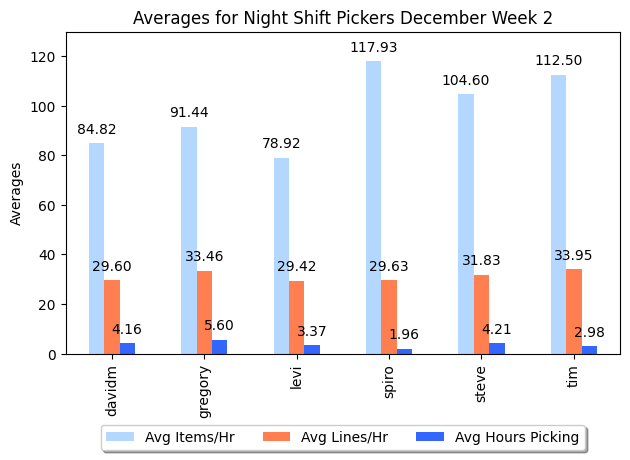

<Figure size 1000x600 with 0 Axes>

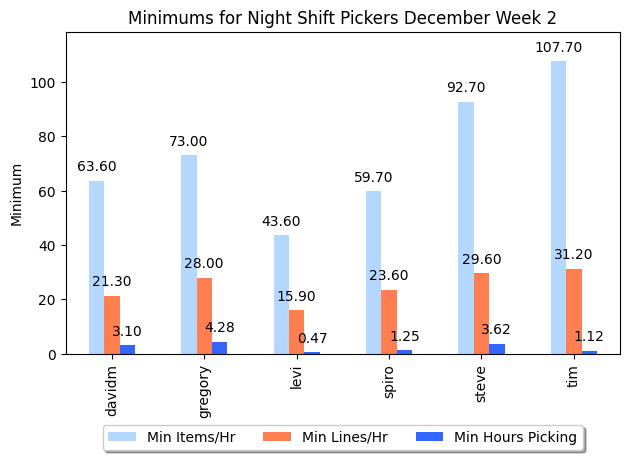

<Figure size 1000x600 with 0 Axes>

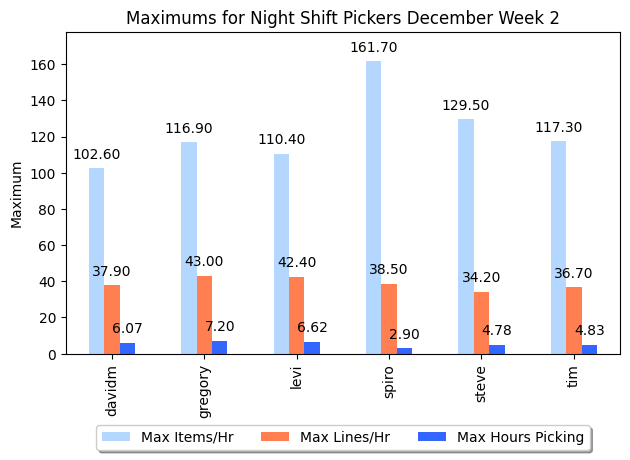

In [15]:
#create a dataframe with the averages 

data_averages = {
    'Avg Items/Hr': avg_items_per_hour,
    'Avg Lines/Hr': avg_lines_per_hour,
    'Avg Hours Picking': avg_hours_picking
}

# Creating a DataFrame from the calculated averages
df = pd.DataFrame(data_averages)
colors = ['#B4D7FF', '#FF7F50', '#3366FF']  # Replace with desired colors using hex codes or other formats

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = df.plot(kind='bar', color=colors)
plt.xlabel('User')
plt.ylabel('Averages')
plt.title('Averages for Night Shift Pickers December Week 2')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=3)


# Adding values on top of each bar
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', 
                 xytext=(0, 5), 
                 textcoords='offset points')
plt.margins(y=0.1)  # Adjust the vertical margin

plt.tight_layout()
plt.show()



#create a dataframe with the minimum

data_minimum = {
    'Min Items/Hr': min_items_per_hour,
    'Min Lines/Hr': min_lines_per_hour,
    'Min Hours Picking': min_hours_picking
}

# Creating a DataFrame from the calculated averages
df_min = pd.DataFrame(data_minimum)
colors = ['#B4D7FF', '#FF7F50', '#3366FF']  # Replace with desired colors using hex codes or other formats

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = df_min.plot(kind='bar', color=colors)
plt.xlabel('User')
plt.ylabel('Minimum')
plt.title('Minimums for Night Shift Pickers December Week 2')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=3)


# Adding values on top of each bar
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', 
                 xytext=(0, 5), 
                 textcoords='offset points')
plt.margins(y=0.1)  # Adjust the vertical margin

plt.tight_layout()
plt.show()


#create a dataframe with the maximum

data_maximum = {
    'Max Items/Hr': max_items_per_hour,
    'Max Lines/Hr': max_lines_per_hour,
    'Max Hours Picking': max_hours_picking
}

# Creating a DataFrame from the calculated averages
df_max= pd.DataFrame(data_maximum)
colors = ['#B4D7FF', '#FF7F50', '#3366FF']  # Replace with desired colors using hex codes or other formats

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = df_max.plot(kind='bar', color=colors)
plt.xlabel('User')
plt.ylabel('Maximum')
plt.title('Maximums for Night Shift Pickers December Week 2')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=3)


# Adding values on top of each bar
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', 
                 xytext=(0, 5), 
                 textcoords='offset points')
plt.margins(y=0.1)  # Adjust the vertical margin

plt.tight_layout()
plt.show()



In [15]:
# Specify the file path where you want to save the CSV file
file_path_averages = 'NSdata_averagesWk2.csv'

# Export the DataFrame to a CSV file
df.to_csv(file_path_averages)

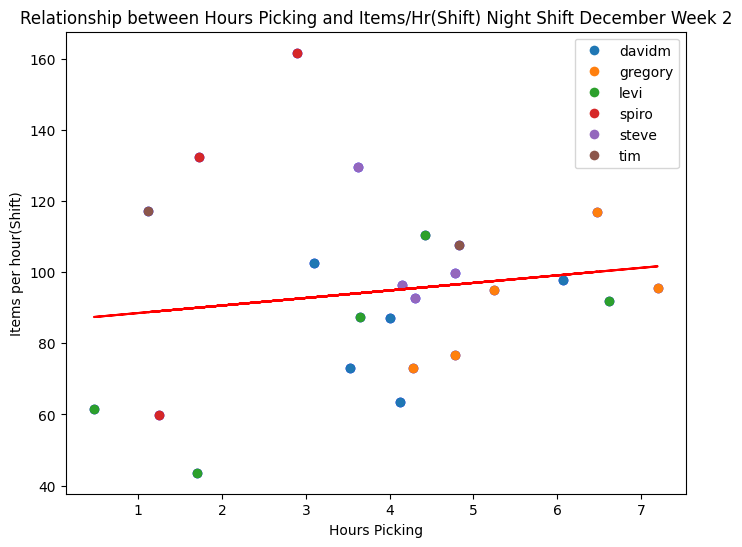

In [16]:
user_names = filtered_data_Nights['user_name']
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data_Nights['Hours_Picking'], filtered_data_Nights['Items/hr(Shift)'], color='blue')

x = filtered_data_Nights['Hours_Picking']
y = filtered_data_Nights['Items/hr(Shift)']
m, b = np.polyfit(x,y,1)

plt.plot(x,m*x + b, color='red', label='Trend Line')

unique_users = user_names.unique()
user_lines = {}


for user in unique_users:
    user_data = filtered_data_Nights[user_names == user]
    plt.scatter(user_data['Hours_Picking'], user_data['Items/hr(Shift)'], label=user)
    

legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=f'C{i}',markersize=8, label=user) for i, user in enumerate(unique_users)]
plt.legend(handles=legend_elements, loc='upper right')




plt.xlabel('Hours Picking')
plt.ylabel('Items per hour(Shift)')
plt.title('Relationship between Hours Picking and Items/Hr(Shift) Night Shift December Week 2')
plt.show()

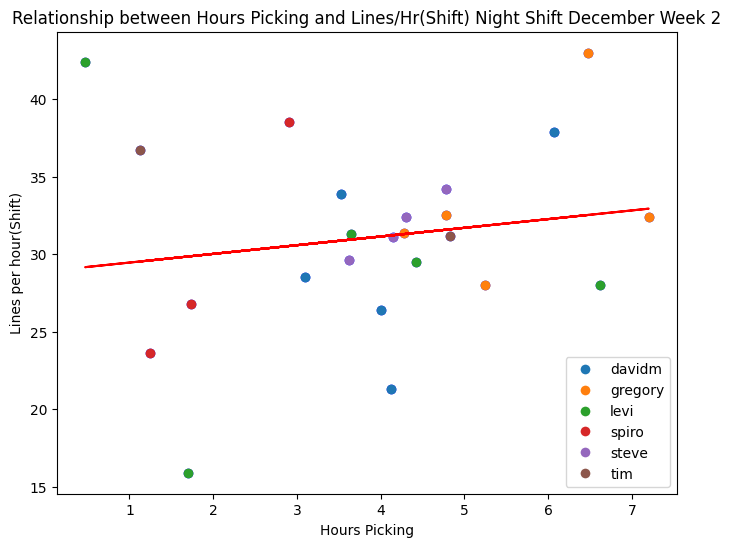

In [17]:
user_names = filtered_data_Nights['user_name']
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data_Nights['Hours_Picking'], filtered_data_Nights['Lines/hr(Shift)'], color='blue')

#calculate trend line

x = filtered_data_Nights['Hours_Picking']
y = filtered_data_Nights['Lines/hr(Shift)']
m, b = np.polyfit(x,y,1)


plt.plot(x,m*x + b, color='red', label='Trend Line')

unique_users = user_names.unique()
user_lines = {}


for user in unique_users:
    user_data = filtered_data_Nights[user_names == user]
    plt.scatter(user_data['Hours_Picking'], user_data['Lines/hr(Shift)'], label=user)
    

legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=f'C{i}',markersize=8, label=user) for i, user in enumerate(unique_users)]
plt.legend(handles=legend_elements, loc='lower right')


plt.xlabel('Hours Picking')
plt.ylabel('Lines per hour(Shift)')
plt.title('Relationship between Hours Picking and Lines/Hr(Shift) Night Shift December Week 2')
plt.show()

In [18]:

fig = px.scatter(filtered_data, x='Hours_Picking', y='Items/hr(Shift)', color='user_name',trendline='ols',
                 title='Hours Picking vs Items/hr(Shift) for Night Shift December Week 2')

fig.update_traces(marker=dict(size=8, opacity=1))

fig.show()

NameError: name 'filtered_data' is not defined

In [ ]:
fig = px.scatter(filtered_data, x='Hours_Picking', y='Lines/hr(Shift)', color='user_name',trendline='ols',
                 labels={'Hours_Picking': 'Hours Picking', 'Lines/hr(Shift)' : 'Lines/Hr(Shift)'},
                 title='Hours Picking vs Lines/hr(Shift) for Night Shift December Week 2')

fig.update_traces(marker=dict(size=8, opacity=1))

fig.show()

/tmp/ipykernel_799/3169534322.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df_avg['Avg Hours Picking'][i], df_avg['Avg Lines/Hr'][i], df_avg.index[i], fontsize=8)


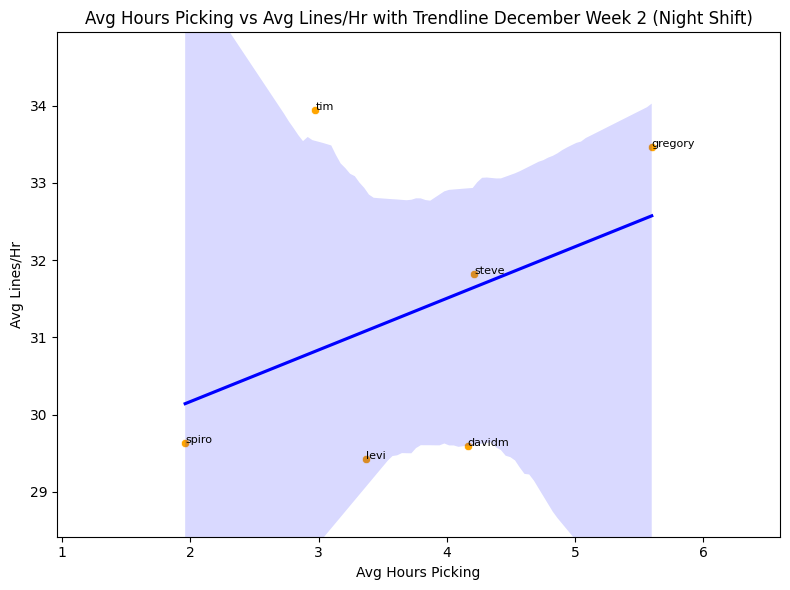

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data_averages_day is a dictionary

# Convert the dictionary to a DataFrame
df_avg = pd.DataFrame(data_averages)

plt.figure(figsize=(8, 6))

# Create a scatter plot
sns.scatterplot(x='Avg Hours Picking', y='Avg Lines/Hr', data=df_avg, color='orange')

# Add a trendline (regression line)
sns.regplot(x='Avg Hours Picking', y='Avg Lines/Hr', data=df_avg, scatter=False, color='blue')

# Add labels for each point (usernames)
for i in range(len(df_avg)):
    plt.text(df_avg['Avg Hours Picking'][i], df_avg['Avg Lines/Hr'][i], df_avg.index[i], fontsize=8)

# Adjust plot limits to include all data points
plt.xlim(df_avg['Avg Hours Picking'].min() - 1, df_avg['Avg Hours Picking'].max() + 1)
plt.ylim(df_avg['Avg Lines/Hr'].min() - 1, df_avg['Avg Lines/Hr'].max() + 1)

plt.xlabel('Avg Hours Picking')
plt.ylabel('Avg Lines/Hr')
plt.title('Avg Hours Picking vs Avg Lines/Hr with Trendline December Week 2 (Night Shift)')
plt.tight_layout()
plt.show()


/tmp/ipykernel_799/2497099070.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df_avg['Avg Hours Picking'][i], df_avg['Avg Items/Hr'][i], df_avg.index[i], fontsize=8)


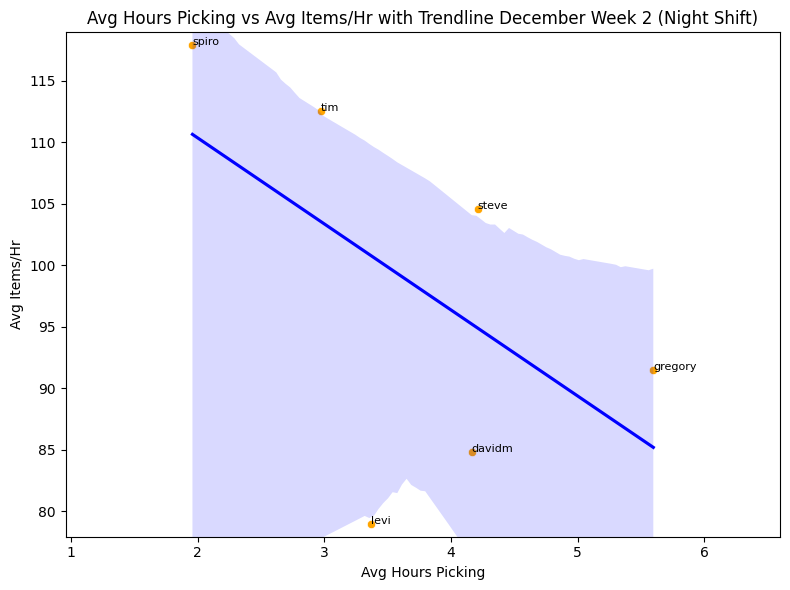

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data_averages_day is a dictionary

# Convert the dictionary to a DataFrame
df_avg = pd.DataFrame(data_averages)

plt.figure(figsize=(8, 6))

# Create a scatter plot
sns.scatterplot(x='Avg Hours Picking', y='Avg Items/Hr', data=df_avg, color='orange')

# Add a trendline (regression line)
sns.regplot(x='Avg Hours Picking', y='Avg Items/Hr', data=df_avg, scatter=False, color='blue')

# Add labels for each point (usernames)
for i in range(len(df_avg)):
    plt.text(df_avg['Avg Hours Picking'][i], df_avg['Avg Items/Hr'][i], df_avg.index[i], fontsize=8)

# Adjust plot limits to include all data points
plt.xlim(df_avg['Avg Hours Picking'].min() - 1, df_avg['Avg Hours Picking'].max() + 1)
plt.ylim(df_avg['Avg Items/Hr'].min() - 1, df_avg['Avg Items/Hr'].max() + 1)

plt.xlabel('Avg Hours Picking')
plt.ylabel('Avg Items/Hr')
plt.title('Avg Hours Picking vs Avg Items/Hr with Trendline December Week 2 (Night Shift)')
plt.tight_layout()
plt.show()


### Day Shift ###

In [9]:
#Group by day of week and user name to find the earliest start time

earliest_start_time = DecWk2_Data.groupby(['Day_of_Week', 'user_name'])['First_Pick_Started'].min().reset_index()

table_view = earliest_start_time.pivot_table(index='user_name',columns='Day_of_Week', values='First_Pick_Started', aggfunc='min')      

table_view = table_view.fillna(0)

print(table_view)

Day_of_Week         1         2         3         4         5        6
user_name                                                             
Troy                0   8:27 AM   8:11 AM   8:14 AM   8:04 AM  8:26 AM
damir               0   8:30 AM   9:44 AM   8:19 AM   8:04 AM  8:17 AM
davidm       10:13 PM  10:10 PM  10:04 PM  10:13 PM   8:11 PM        0
gregory      10:32 PM  10:11 PM  10:07 PM  10:23 PM   8:24 PM        0
jackr               0         0         0         0         0  4:50 PM
justin        6:38 PM   6:44 PM   6:31 PM   6:48 PM   6:52 PM        0
kane                0   7:13 AM   7:03 AM   6:59 AM   7:04 AM  8:38 AM
lachlyn             0         0         0   9:04 AM         0        0
levi         10:08 PM  10:11 PM  10:03 PM  10:08 PM   8:10 PM        0
logan               0         0         0   6:21 AM         0        0
mick                0         0         0  11:45 PM         0        0
owenl               0         0         0         0   9:49 AM        0
richie

In [10]:
Day_shift = ['Troy', 'damir', 'jackr', 'jessek','justin','kane', 'lachlyn','owenl','simonb']
desired_days = [1,2,3,4,5,6]

In [11]:
filtered_data_Day = DecWk2_Data[
    (DecWk2_Data['user_name'].isin(Day_shift))&
    (DecWk2_Data['Day_of_Week'].isin(desired_days))]

In [12]:
table_view_Start = filtered_data_Day.pivot_table(index='user_name', columns='Day_of_Week', values='First_Pick_Started', aggfunc='min')
table_view_Start = table_view_Start.fillna(0)
table_view_Start = table_view_Start.rename(columns={1: 'Sun 10th', 2: 'Mon 11th', 3: 'Tues 12th', 4: 'Wed 13th', 5: 'Thurs 14th', 6: 'Fri 15th'})

# Adding titles for index and columns
table_view_Start = table_view_Start.rename_axis('Users Start Time', axis='index')
table_view_Start = table_view_Start.rename_axis('Days', axis='columns')
print(table_view_Start)

table_view_End = filtered_data_Day.pivot_table(index='user_name', columns='Day_of_Week', values='Last_Pick_Completed', aggfunc='min')
table_view_End = table_view_End.fillna(0)
table_view_End = table_view_End.rename(columns={1: 'Sun 10th', 2: 'Mon 11th', 3: 'Tues 12th', 4: 'Wed 13th', 5: 'Thurs 14th', 6: 'Fri 15th'})

# Adding titles for index and columns
table_view_End = table_view_End.rename_axis('Users End Time', axis='index')
table_view_End = table_view_End.rename_axis('Days', axis='columns')

print(table_view_End)

Days             Sun 10th Mon 11th Tues 12th Wed 13th Thurs 14th Fri 15th
Users Start Time                                                         
Troy                    0  8:27 AM   8:11 AM  8:14 AM    8:04 AM  8:26 AM
damir                   0  8:30 AM   9:44 AM  8:19 AM    8:04 AM  8:17 AM
jackr                   0        0         0        0          0  4:50 PM
justin            6:38 PM  6:44 PM   6:31 PM  6:48 PM    6:52 PM        0
kane                    0  7:13 AM   7:03 AM  6:59 AM    7:04 AM  8:38 AM
lachlyn                 0        0         0  9:04 AM          0        0
owenl                   0        0         0        0    9:49 AM        0
Days           Sun 10th Mon 11th Tues 12th  Wed 13th Thurs 14th Fri 15th
Users End Time                                                          
Troy                  0  3:42 PM   3:50 PM   3:41 PM    3:41 PM  3:40 PM
damir                 0  3:26 PM   2:27 PM   2:41 PM    5:58 PM  6:34 PM
jackr                 0        0         0

In [ ]:
avg_items_per_hour_day = filtered_data_Day.groupby('user_name')['Items/hr(Shift)'].mean()
avg_lines_per_hour_day = filtered_data_Day.groupby('user_name')['Lines/hr(Shift)'].mean()
avg_hours_picking_day = filtered_data_Day.groupby('user_name')['Hours_Picking'].mean()

#print(avg_items_per_hour_day)
#print(avg_lines_per_hour_day)
#print(avg_hours_picking_day)


min_items_per_hour_day = filtered_data_Day.groupby('user_name')['Items/hr(Shift)'].min()
min_lines_per_hour_day = filtered_data_Day.groupby('user_name')['Lines/hr(Shift)'].min()
min_hours_picking_day = filtered_data_Day.groupby('user_name')['Hours_Picking'].min()

#print(min_items_per_hour_day)
#print(min_lines_per_hour_day)
#print(min_hours_picking_day)

max_items_per_hour_day = filtered_data_Day.groupby('user_name')['Items/hr(Shift)'].max()
max_lines_per_hour_day = filtered_data_Day.groupby('user_name')['Lines/hr(Shift)'].max()
max_hours_picking_day = filtered_data_Day.groupby('user_name')['Hours_Picking'].max()

#print(max_items_per_hour_day)
#print(max_lines_per_hour_day)
#print(max_hours_picking_day)


In [ ]:
Day_Stats = {
    'Avg Items/Hr': avg_items_per_hour_day,
    'Avg Lines/Hr': avg_lines_per_hour_day,
    'Avg Hours Picking': avg_hours_picking_day,
    'Min Items/Hr':min_items_per_hour_day,
    'Min Lines/Hr':min_lines_per_hour_day,
    'Min Hours Picking':min_hours_picking_day,
    'Max Items/Hr':max_items_per_hour_day,
    'Max Lines/Hr':max_lines_per_hour_day,
    'Max Hours Picking':max_hours_picking_day
}

df_day_stats = pd.DataFrame(Day_Stats)
# Specify the file path where you want to save the CSV file
file_path_Day_Stats = 'Day_Stats_Wk2.csv'

# Export the DataFrame to a CSV file
df_day_stats.to_csv(file_path_Day_Stats)

<Figure size 1000x600 with 0 Axes>

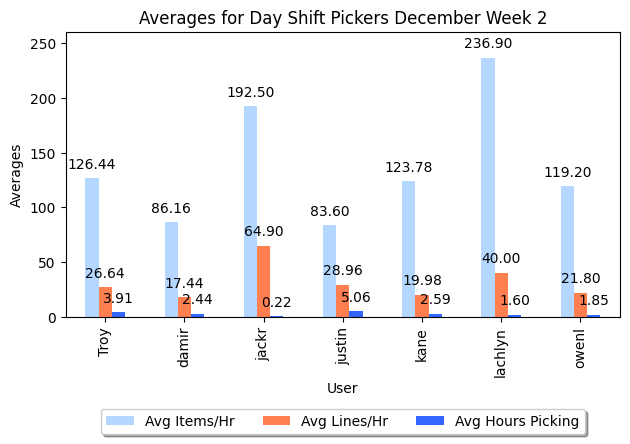

<Figure size 1000x600 with 0 Axes>

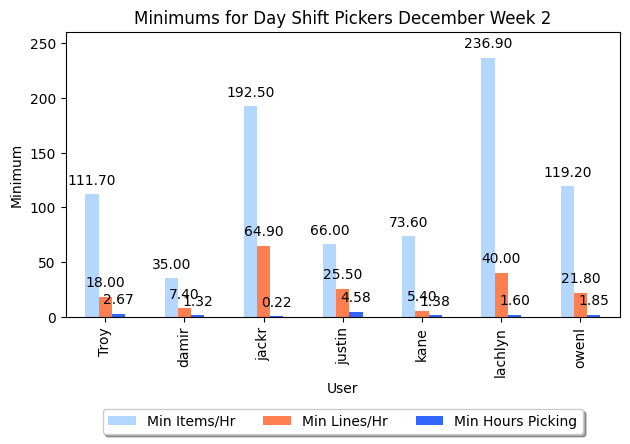

<Figure size 1000x600 with 0 Axes>

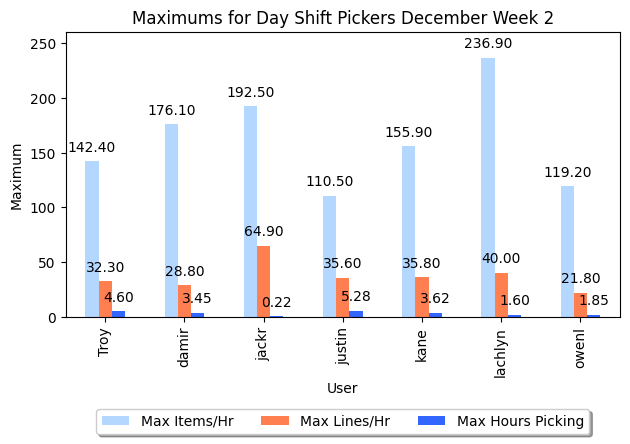

In [65]:
#create a dataframe with the averages 

data_averages_day = {
    'Avg Items/Hr': avg_items_per_hour_day,
    'Avg Lines/Hr': avg_lines_per_hour_day,
    'Avg Hours Picking': avg_hours_picking_day
}

# Creating a DataFrame from the calculated averages
df_day = pd.DataFrame(data_averages_day)
colors = ['#B4D7FF', '#FF7F50', '#3366FF']  # Replace with desired colors using hex codes or other formats

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = df_day.plot(kind='bar', color=colors)
plt.xlabel('User')
plt.ylabel('Averages')
plt.title('Averages for Day Shift Pickers December Week 2')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), shadow=True, ncol=3)


# Adding values on top of each bar
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', 
                 xytext=(0, 5), 
                 textcoords='offset points')
plt.margins(y=0.1)  # Adjust the vertical margin

plt.tight_layout()
plt.show()


#create a dataframe with the minimum

data_minimum_day = {
    'Min Items/Hr': min_items_per_hour_day,
    'Min Lines/Hr': min_lines_per_hour_day,
    'Min Hours Picking': min_hours_picking_day
}

# Creating a DataFrame from the calculated averages
df_min_day = pd.DataFrame(data_minimum_day)
colors = ['#B4D7FF', '#FF7F50', '#3366FF']  # Replace with desired colors using hex codes or other formats

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = df_min_day.plot(kind='bar', color=colors)
plt.xlabel('User')
plt.ylabel('Minimum')
plt.title('Minimums for Day Shift Pickers December Week 2')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), shadow=True, ncol=3)


# Adding values on top of each bar
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', 
                 xytext=(0, 5), 
                 textcoords='offset points')
plt.margins(y=0.1)  # Adjust the vertical margin

plt.tight_layout()
plt.show()


#create a dataframe with the maximum

data_maximum_day = {
    'Max Items/Hr': max_items_per_hour_day,
    'Max Lines/Hr': max_lines_per_hour_day,
    'Max Hours Picking': max_hours_picking_day
}

# Creating a DataFrame from the calculated averages
df_max_day= pd.DataFrame(data_maximum_day)
colors = ['#B4D7FF', '#FF7F50', '#3366FF']  # Replace with desired colors using hex codes or other formats

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = df_max_day.plot(kind='bar', color=colors)
plt.xlabel('User')
plt.ylabel('Maximum')
plt.title('Maximums for Day Shift Pickers December Week 2')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), shadow=True, ncol=3)


# Adding values on top of each bar
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom', 
                 xytext=(0, 5), 
                 textcoords='offset points')
plt.margins(y=0.1)  # Adjust the vertical margin

plt.tight_layout()
plt.show()

In [66]:
# Specify the file path where you want to save the CSV file
file_path_averages_day = 'DSdata_averagesWk2.csv'

# Export the DataFrame to a CSV file
df_day.to_csv(file_path_averages_day)

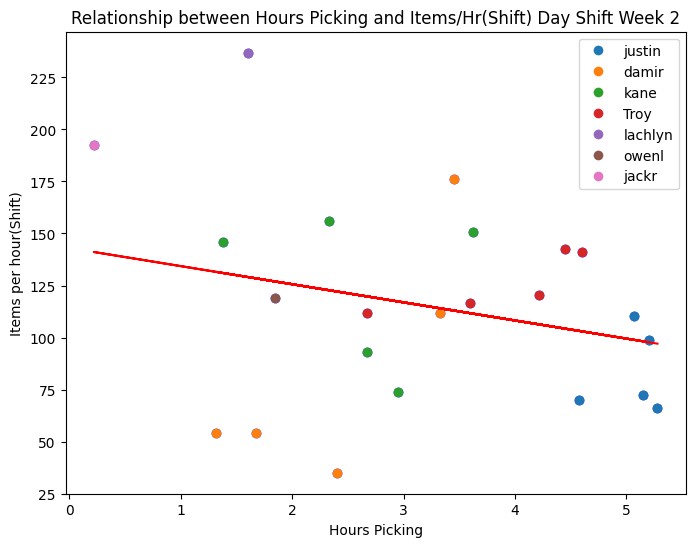

In [67]:
user_names_day = filtered_data_Day['user_name']
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data_Day['Hours_Picking'], filtered_data_Day['Items/hr(Shift)'], color='blue')

x = filtered_data_Day['Hours_Picking']
y = filtered_data_Day['Items/hr(Shift)']
m, b = np.polyfit(x,y,1)

plt.plot(x,m*x + b, color='red', label='Trend Line')

unique_users_day = user_names_day.unique()
user_lines_day = {}


for user in unique_users_day:
    user_data_day = filtered_data_Day[user_names_day == user]
    plt.scatter(user_data_day['Hours_Picking'], user_data_day['Items/hr(Shift)'], label=user)
    

legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=f'C{i}',markersize=8, label=user) for i, user in enumerate(unique_users_day)]
plt.legend(handles=legend_elements, loc='upper right')




plt.xlabel('Hours Picking')
plt.ylabel('Items per hour(Shift)')
plt.title('Relationship between Hours Picking and Items/Hr(Shift) Day Shift Week 2')
plt.show()

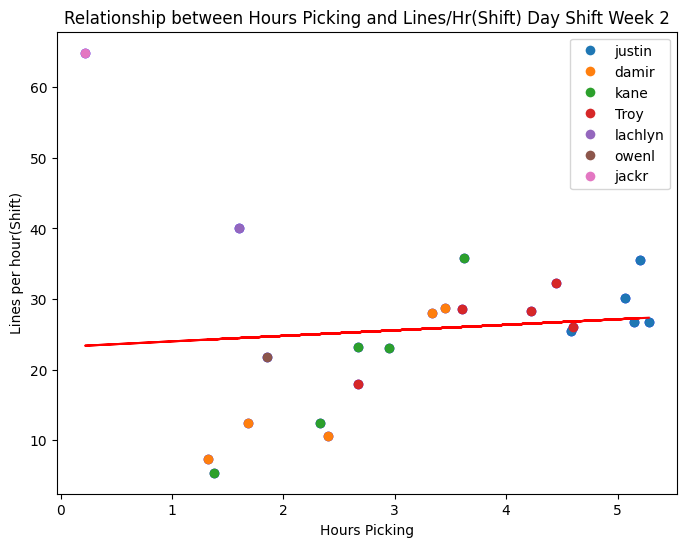

In [68]:
user_names_day = filtered_data_Day['user_name']
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data_Day['Hours_Picking'], filtered_data_Day['Lines/hr(Shift)'], color='blue')

x = filtered_data_Day['Hours_Picking']
y = filtered_data_Day['Lines/hr(Shift)']
m, b = np.polyfit(x,y,1)

plt.plot(x,m*x + b, color='red', label='Trend Line')

unique_users_day = user_names_day.unique()
user_lines_day = {}


for user in unique_users_day:
    user_data_day = filtered_data_Day[user_names_day == user]
    plt.scatter(user_data_day['Hours_Picking'], user_data_day['Lines/hr(Shift)'], label=user)
    

legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=f'C{i}',markersize=8, label=user) for i, user in enumerate(unique_users_day)]
plt.legend(handles=legend_elements, loc='upper right')




plt.xlabel('Hours Picking')
plt.ylabel('Lines per hour(Shift)')
plt.title('Relationship between Hours Picking and Lines/Hr(Shift) Day Shift Week 2')
plt.show()

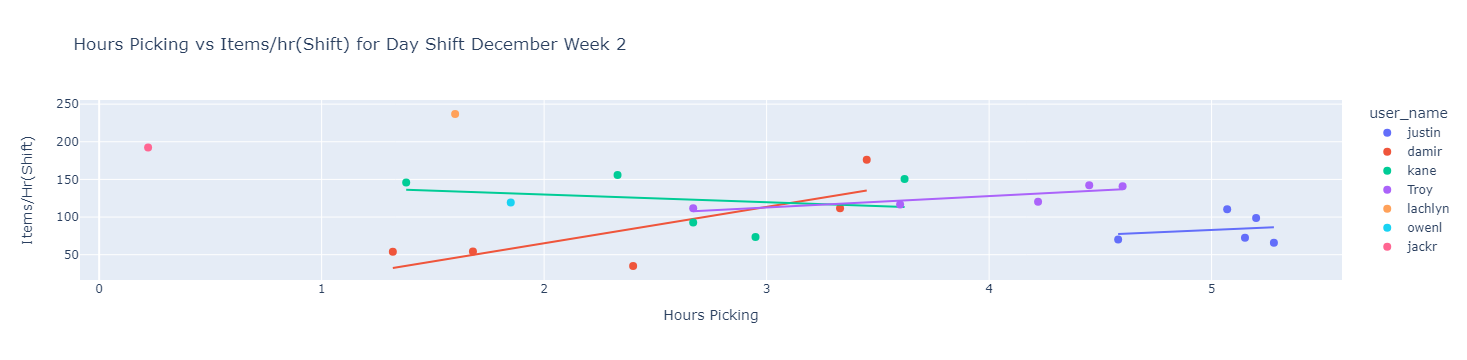

In [69]:
fig = px.scatter(filtered_data_Day, x='Hours_Picking', y='Items/hr(Shift)', color='user_name',trendline='ols',
                 labels={'Hours_Picking': 'Hours Picking', 'Items/hr(Shift)' : 'Items/Hr(Shift)'},
                 title='Hours Picking vs Items/hr(Shift) for Day Shift December Week 2')

fig.update_traces(marker=dict(size=8, opacity=1))

fig.show()

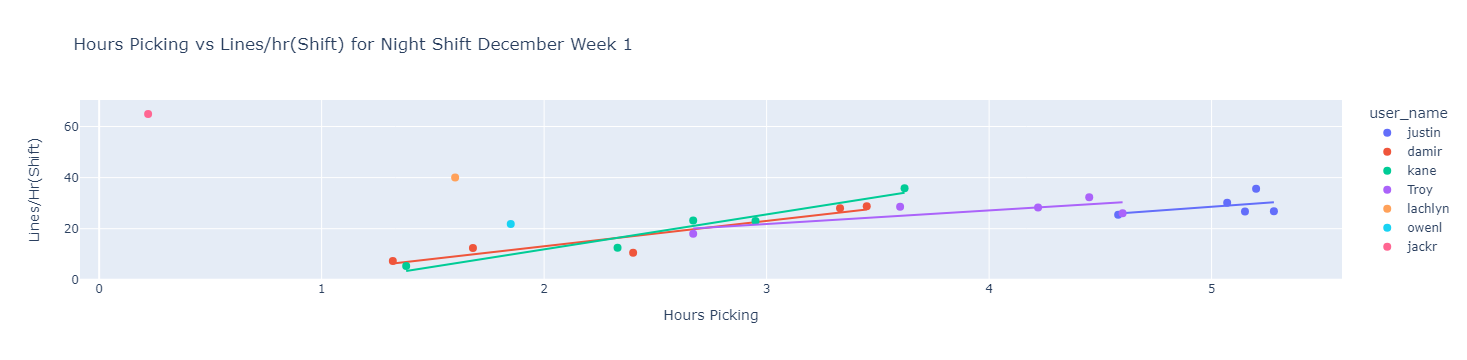

In [70]:
fig = px.scatter(filtered_data_Day, x='Hours_Picking', y='Lines/hr(Shift)', color='user_name',trendline='ols',
                 labels={'Hours_Picking': 'Hours Picking', 'Lines/hr(Shift)' : 'Lines/Hr(Shift)'},
                 title='Hours Picking vs Lines/hr(Shift) for Night Shift December Week 2')

fig.update_traces(marker=dict(size=8, opacity=1))

fig.show()

/tmp/ipykernel_2548/1117831759.py:20: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



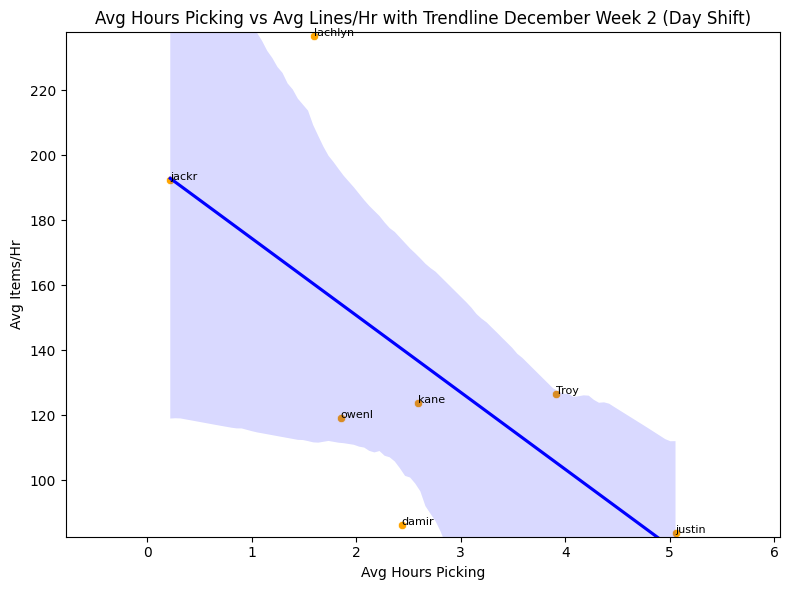

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data_averages_day is a dictionary

# Convert the dictionary to a DataFrame
df_day_avg = pd.DataFrame(data_averages_day)

plt.figure(figsize=(8, 6))

# Create a scatter plot
sns.scatterplot(x='Avg Hours Picking', y='Avg Items/Hr', data=df_day_avg, color='orange')

# Add a trendline (regression line)
sns.regplot(x='Avg Hours Picking', y='Avg Items/Hr', data=df_day_avg, scatter=False, color='blue')

# Add labels for each point (usernames)
for i in range(len(df_day_avg)):
    plt.text(df_day_avg['Avg Hours Picking'][i], df_day_avg['Avg Items/Hr'][i], df_day_avg.index[i], fontsize=8)

# Adjust plot limits to include all data points
plt.xlim(df_day_avg['Avg Hours Picking'].min() - 1, df_day_avg['Avg Hours Picking'].max() + 1)
plt.ylim(df_day_avg['Avg Items/Hr'].min() - 1, df_day_avg['Avg Items/Hr'].max() + 1)

plt.xlabel('Avg Hours Picking')
plt.ylabel('Avg Items/Hr')
plt.title('Avg Hours Picking vs Avg Lines/Hr with Trendline December Week 2 (Day Shift)')
plt.tight_layout()
plt.show()


/tmp/ipykernel_2548/976921215.py:20: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



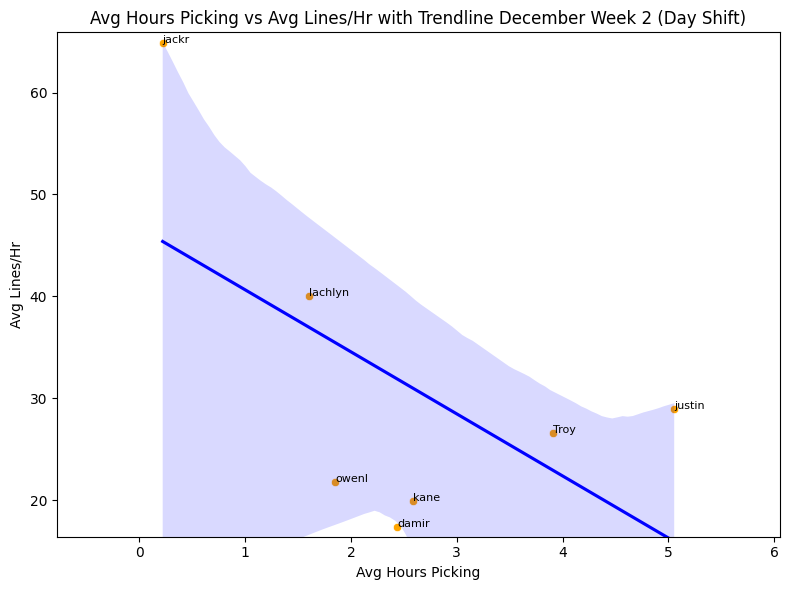

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data_averages_day is a dictionary

# Convert the dictionary to a DataFrame
df_day_avg = pd.DataFrame(data_averages_day)

plt.figure(figsize=(8, 6))

# Create a scatter plot
sns.scatterplot(x='Avg Hours Picking', y='Avg Lines/Hr', data=df_day_avg, color='orange')

# Add a trendline (regression line)
sns.regplot(x='Avg Hours Picking', y='Avg Lines/Hr', data=df_day_avg, scatter=False, color='blue')

# Add labels for each point (usernames)
for i in range(len(df_day_avg)):
    plt.text(df_day_avg['Avg Hours Picking'][i], df_day_avg['Avg Lines/Hr'][i], df_day_avg.index[i], fontsize=8)

# Adjust plot limits to include all data points
plt.xlim(df_day_avg['Avg Hours Picking'].min() - 1, df_day_avg['Avg Hours Picking'].max() + 1)
plt.ylim(df_day_avg['Avg Lines/Hr'].min() - 1, df_day_avg['Avg Lines/Hr'].max() + 1)

plt.xlabel('Avg Hours Picking')
plt.ylabel('Avg Lines/Hr')
plt.title('Avg Hours Picking vs Avg Lines/Hr with Trendline December Week 2 (Day Shift)')
plt.tight_layout()
plt.show()
